Предположим, что Толя любит авокадо и решил посмотреть динамику цен на данный продукт в США. Имеется следующий набор данных от Hass Avocado Board 🥑:

* Date — дата
* AveragePrice — средняя цена одного авокадо
* Total Volume — количество проданных авокадо
* 4046 — количество проданных авокадо PLU* 4046
* 4225 — количество проданных авокадо PLU 4225
* 4770 — количество проданных авокадо PLU 4770
* Total Bags — всего упаковок
* Small Bags — маленькие упаковки
* Large Bags — большие
* XLarge Bags — очень большие
* type — обычный или органический
* year — год
* Region — город или регион the city or region of the observation
* *PLU — код товара (Product Lookup code)

В датафрейме находятся данные не за каждый день, а за конец каждой недели. Для каждой даты есть несколько наблюдений, отличающихся по типу авокадо и региону продажи. Предположим, что нас это разделение не интересует, поэтому в avocado_mean записаны агрегированные данные, где:

`avocado_mean = pd.read_csv("https://stepik.org/media/attachments/lesson/362453/avocado_mean.csv",
                           index_col=0, squeeze=True, parse_dates=['Date'])`
                           
`Date
2015-01-04    1.301296
2015-01-11    1.370648
2015-01-18    1.391111
2015-01-25    1.397130
2015-02-01    1.247037
Name: AveragePrice, dtype: float64`

In [1]:
import pandas as pd
import seaborn as sns
avocado_mean = pd.read_csv("avocado_mean.csv", index_col=0, parse_dates=['Date']).squeeze("columns")

In [2]:
avocado_mean

Date
2015-01-04    1.301296
2015-01-11    1.370648
2015-01-18    1.391111
2015-01-25    1.397130
2015-02-01    1.247037
                ...   
2018-02-25    1.359630
2018-03-04    1.350185
2018-03-11    1.335093
2018-03-18    1.313704
2018-03-25    1.346852
Name: AveragePrice, Length: 169, dtype: float64

Посчитайте скользящее среднее цены авокадо (AveragePrice) с окном равным 3 (window). Чему равно максимальное значение? Ответ округлите до 2 знаков после точки.


In [3]:
avocado_mean.rolling(window=3).mean().max().round(2)

1.85

Отлично! Помимо авокадо, Толя любит смотреть на графики. Самое время посмотреть, как изменится график в зависимости от выбранного размера окна.

Ваша задача — построить графики скользящего среднего с разными значениями параметра window (2, 4, 10, 50), посмотреть на изменения и соотнести приведенные ниже картинки с соответствующим значением размера окна.
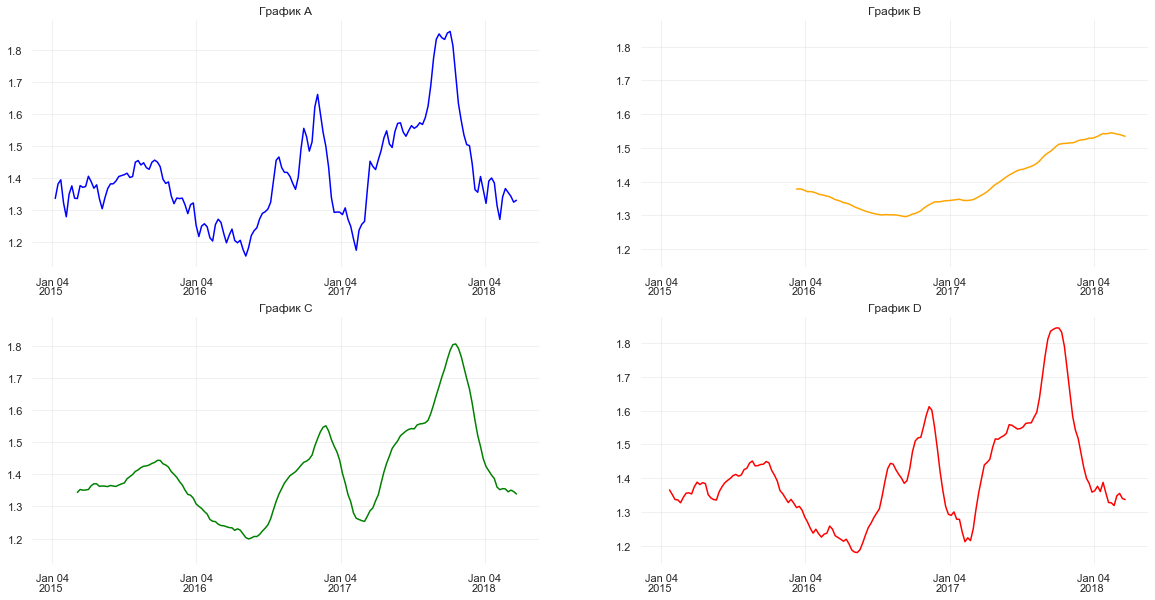

<AxesSubplot: ylabel='AveragePrice'>

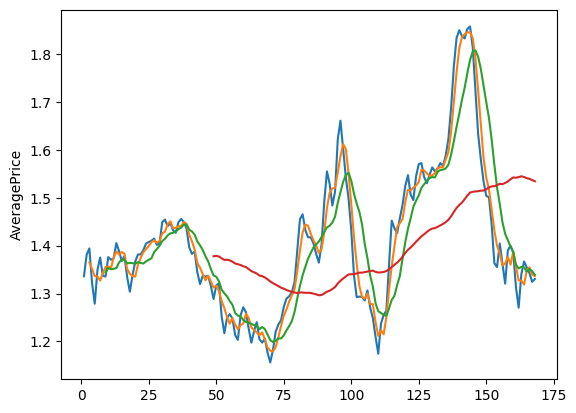

In [118]:
sns.lineplot( df.AveragePrice.rolling(window=2).mean())
sns.lineplot( df.AveragePrice.rolling(window=4).mean())
sns.lineplot( df.AveragePrice.rolling(window=10).mean())
sns.lineplot( df.AveragePrice.rolling(window=50).mean())

In [119]:
df.AveragePrice.rolling(window=2).mean()

0           NaN
1      1.335972
2      1.380880
3      1.394120
4      1.322083
         ...   
164    1.366852
165    1.354907
166    1.342639
167    1.324398
168    1.330278
Name: AveragePrice, Length: 169, dtype: float64

In [120]:
df = pd.DataFrame(avocado_mean)
df = df.reset_index()
df

,Date,AveragePrice
0,2015-01-04,1.301296
1,2015-01-11,1.370648
2,2015-01-18,1.391111
3,2015-01-25,1.397130
4,2015-02-01,1.247037
...,...,...
164,2018-02-25,1.359630
165,2018-03-04,1.350185
166,2018-03-11,1.335093
167,2018-03-18,1.313704


​​​​Изучите параметры функции в документации и соотнесите их с соответствующим описанием.
DataFrame.rolling
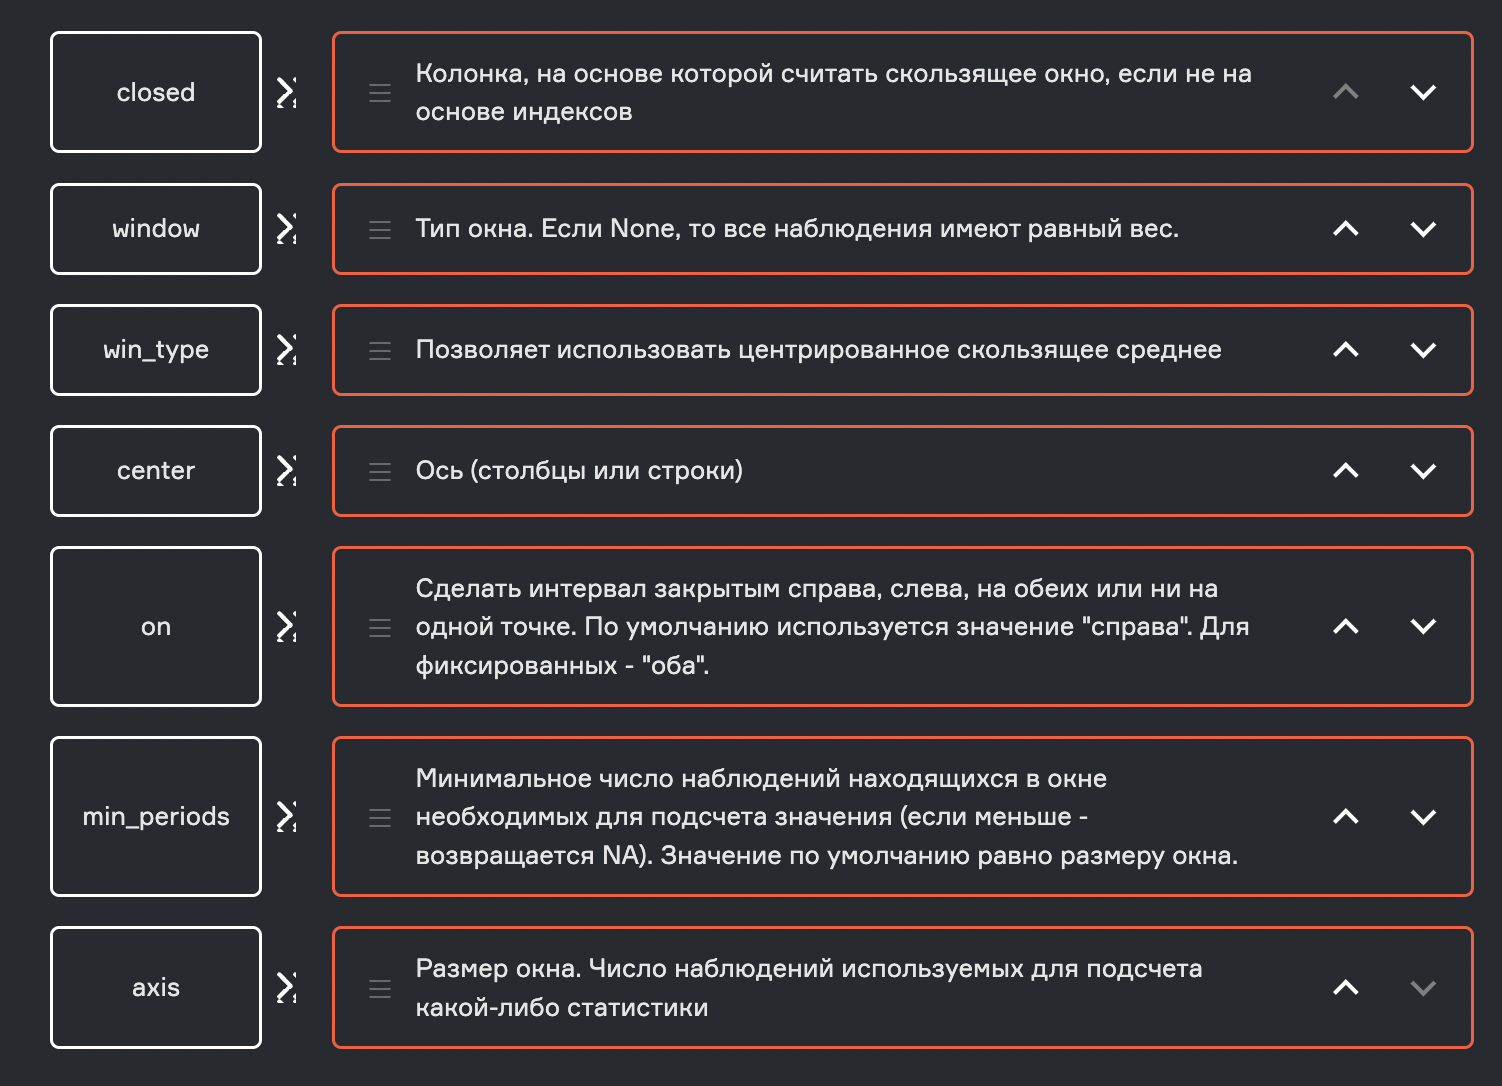


Используйте агрегированные данные о ценах на авокадо и примените функцию ewm() с параметром span=2, чтобы получить экспоненциальное скользящее среднее. Запишите результат в avocado_ewm.



In [123]:
avocado_ewm = df.AveragePrice.ewm(span=2).mean()
avocado_ewm

0      1.301296
1      1.353310
2      1.379480
3      1.391394
4      1.294758
         ...   
164    1.356212
165    1.352194
166    1.340793
167    1.322734
168    1.338812
Name: AveragePrice, Length: 169, dtype: float64

И еще одно задание, чтобы закрепить материал. Импортируйте полные данные, указав index_col=0 (использовать первую колонку как индекс).

Для авокадо типа organic (type) в Чикаго (region) посчитайте скользящее среднее с окном 4 и экспоненциальное скользящее среднее с параметром span=4. Постройте графики, а затем заполните пропуски. Числа округлите до трех знаков после точки.

Ряд, полученный с помощью 
ВЫБРАТЬ
 на промежутке от с июля 2016 до декабря 2016 является более сглаженным. Средняя цена за авокадо 21 августа 2016 года при подсчете скользящего среднего была равна 
ВЫБРАТЬ
, что 
ВЫБРАТЬ
 чем при использовании экспоненциального. 19 февраля 2017 среднее, полученное с помощью ewm(), равнялось 
ВЫБРАТЬ
 , и было 
ВЫБРАТЬ
 чем при использовании rolling(), для которого значение было равно 
ВЫБРАТЬ

<AxesSubplot: xlabel='Date', ylabel='AveragePrice'>

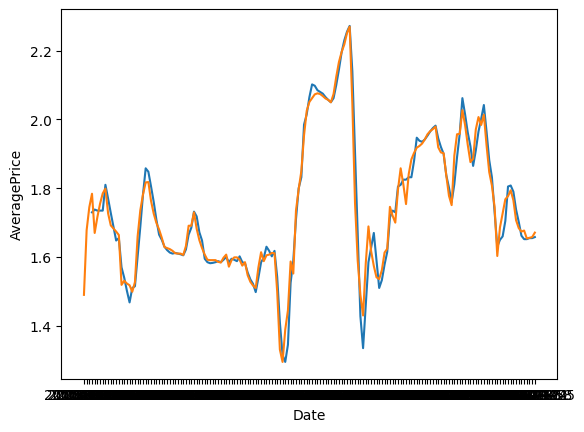

In [124]:
avocado_full = pd.read_csv("avocado_full.csv",index_col=0)
avocado_full.query("region =='Chicago' and type == 'organic'")
sns.lineplot(avocado_full.query("region =='Chicago' and type == 'organic'").AveragePrice.rolling(window=4).mean().round(3))
sns.lineplot(avocado_full.query("region =='Chicago' and type == 'organic'").AveragePrice.ewm(span=4).mean().round(3))

In [140]:
avocado_full_query = avocado_full.query("region =='Chicago' and type == 'organic'").reset_index()
avocado_full_query.Date  = pd.to_datetime(avocado_full_query.Date)
avocado_full_query

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-01-04,1.49,17723.17,1189.35,15628.27,0.0,905.55,905.55,0.00,0.0,organic,2015,Chicago
1,2015-01-11,1.79,12915.74,1426.75,10900.10,0.0,588.89,588.89,0.00,0.0,organic,2015,Chicago
2,2015-01-18,1.81,12499.87,1154.81,10830.61,0.0,514.45,514.45,0.00,0.0,organic,2015,Chicago
3,2015-01-25,1.83,10951.51,711.63,9515.44,0.0,724.44,724.44,0.00,0.0,organic,2015,Chicago
4,2015-02-01,1.52,14391.05,1363.35,11835.47,0.0,1192.23,1192.23,0.00,0.0,organic,2015,Chicago
...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,2018-02-25,1.68,36432.65,246.73,29263.75,0.0,6922.17,6908.84,13.33,0.0,organic,2018,Chicago
165,2018-03-04,1.62,46026.58,1107.05,35255.03,0.0,9664.50,9654.50,10.00,0.0,organic,2018,Chicago
166,2018-03-11,1.66,41969.83,583.18,32382.95,0.0,9003.70,8990.36,13.34,0.0,organic,2018,Chicago
167,2018-03-18,1.66,35542.17,184.53,26955.74,0.0,8401.90,8398.57,3.33,0.0,organic,2018,Chicago


In [141]:
avocado_full_query_rolling =avocado_full_query
avocado_full_query_rolling

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-01-04,1.49,17723.17,1189.35,15628.27,0.0,905.55,905.55,0.00,0.0,organic,2015,Chicago
1,2015-01-11,1.79,12915.74,1426.75,10900.10,0.0,588.89,588.89,0.00,0.0,organic,2015,Chicago
2,2015-01-18,1.81,12499.87,1154.81,10830.61,0.0,514.45,514.45,0.00,0.0,organic,2015,Chicago
3,2015-01-25,1.83,10951.51,711.63,9515.44,0.0,724.44,724.44,0.00,0.0,organic,2015,Chicago
4,2015-02-01,1.52,14391.05,1363.35,11835.47,0.0,1192.23,1192.23,0.00,0.0,organic,2015,Chicago
...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,2018-02-25,1.68,36432.65,246.73,29263.75,0.0,6922.17,6908.84,13.33,0.0,organic,2018,Chicago
165,2018-03-04,1.62,46026.58,1107.05,35255.03,0.0,9664.50,9654.50,10.00,0.0,organic,2018,Chicago
166,2018-03-11,1.66,41969.83,583.18,32382.95,0.0,9003.70,8990.36,13.34,0.0,organic,2018,Chicago
167,2018-03-18,1.66,35542.17,184.53,26955.74,0.0,8401.90,8398.57,3.33,0.0,organic,2018,Chicago


In [143]:
avocado_full_query_rolling.AveragePrice = avocado_full_query.AveragePrice.rolling(4).mean().round(3)

In [144]:
avocado_full_query_rolling.query("Date == '2017-02-19'")

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
111,2017-02-19,1.576,36645.7,324.96,28155.69,0.0,8165.05,8165.05,0.0,0.0,organic,2017,Chicago


In [128]:
avocado_full_query_rolling.query("Date == '2016-08-21'")

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
85,2016-08-21,2.102,31252.62,69.71,29470.17,0.0,1712.74,1712.74,0.0,0.0,organic,2016,Chicago


In [129]:
avocado_full_query_rolling.query("Date == '2016-08-21'").AveragePrice

85    2.102
Name: AveragePrice, dtype: float64

In [130]:
avocado_full

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Date,,,,,,,,,,,,
2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.00,organic,2015,Southeast
2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.00,organic,2015,Chicago
2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.00,organic,2015,HarrisburgScranton
2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.00,conventional,2015,Pittsburgh
2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.00,organic,2015,Boise
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-03-25,1.36,908202.13,142681.06,463136.28,174975.75,127409.04,103579.41,22467.04,1362.59,conventional,2018,Chicago
2018-03-25,0.70,9010588.32,3999735.71,966589.50,30130.82,4014132.29,3398569.92,546409.74,69152.63,conventional,2018,SouthCentral
2018-03-25,1.42,163496.70,29253.30,5080.04,0.00,129163.36,109052.26,20111.10,0.00,organic,2018,SouthCentral


In [135]:
avocado_full_query_ewm =avocado_full_query
avocado_full_query_ewm

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-01-04,1.49,17723.17,1189.35,15628.27,0.0,905.55,905.55,0.00,0.0,organic,2015,Chicago
1,2015-01-11,1.79,12915.74,1426.75,10900.10,0.0,588.89,588.89,0.00,0.0,organic,2015,Chicago
2,2015-01-18,1.81,12499.87,1154.81,10830.61,0.0,514.45,514.45,0.00,0.0,organic,2015,Chicago
3,2015-01-25,1.83,10951.51,711.63,9515.44,0.0,724.44,724.44,0.00,0.0,organic,2015,Chicago
4,2015-02-01,1.52,14391.05,1363.35,11835.47,0.0,1192.23,1192.23,0.00,0.0,organic,2015,Chicago
...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,2018-02-25,1.68,36432.65,246.73,29263.75,0.0,6922.17,6908.84,13.33,0.0,organic,2018,Chicago
165,2018-03-04,1.62,46026.58,1107.05,35255.03,0.0,9664.50,9654.50,10.00,0.0,organic,2018,Chicago
166,2018-03-11,1.66,41969.83,583.18,32382.95,0.0,9003.70,8990.36,13.34,0.0,organic,2018,Chicago
167,2018-03-18,1.66,35542.17,184.53,26955.74,0.0,8401.90,8398.57,3.33,0.0,organic,2018,Chicago


In [136]:
avocado_full_query_ewm.AveragePrice = avocado_full_query.AveragePrice.ewm(span=4).mean().round(3)

In [138]:
avocado_full_query_ewm.query("Date == '2016-08-21'")

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
85,2016-08-21,2.062,31252.62,69.71,29470.17,0.0,1712.74,1712.74,0.0,0.0,organic,2016,Chicago


In [139]:
avocado_full_query_ewm.query("Date == '2017-02-19'")

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
111,2017-02-19,1.562,36645.7,324.96,28155.69,0.0,8165.05,8165.05,0.0,0.0,organic,2017,Chicago


💀 Сложное задание! 💀

Далее будем работать с данными по опозданиям в заключении сделок.

В файле находится информация о том какие компании с кем и на какую сумму заключали сделки, а самое важное – насколько они при этом опоздали. Пример сабсэта данных:

`client_id	company_id	delay	revenue
0	2389	4240	-1 days -14:57:48.000000000	705436
1	7614	9544	-4 days -02:14:23.000000000	859266
2	2052	2427	-0 days -06:08:57.000000000	812416
3	9635	8054	-0 days -23:40:19.000000000	162312
4	8154	5503	-1 days -13:21:53.000000000	658844`

Прочитайте эти данные. Далее переведите delay в timedelta формат. Обратите внимание, что так просто столбец не переведётся – нужно будет убрать -.

NB! На LMS данные уже записаны в переменную df.

Могут понадобиться:

* pd.to_timedelta()
* pd.Series.str

In [18]:
delays = pd.read_csv("delays.csv")
delays.delay = delays.delay.apply(lambda x: x.replace("-", ""))


In [21]:
delays.delay = pd.to_timedelta(delays.delay)
delays

,client_id,company_id,delay,revenue
0,2389,4240,1 days 14:57:48,705436
1,7614,9544,4 days 02:14:23,859266
2,2052,2427,0 days 06:08:57,812416
3,9635,8054,0 days 23:40:19,162312
4,8154,5503,1 days 13:21:53,658844
...,...,...,...,...
259,5837,2617,0 days 05:32:08,602129
260,2384,2364,3 days 23:27:14,910660
261,5146,3331,1 days 15:22:34,401137
262,7203,5532,2 days 17:15:02,308979


Время это хорошо, но хотелось бы также разделить его на промежутки. Разбейте соответствующую колонку на 3 интервала и поместите значения в колонку delay_categorical.

Могут понадобится:

pd.cut()

In [41]:
?pd

Object `lambda` not found.


💀 Сложное задание! 💀

Разбилось неплохо, но хочется чуть более целые значения и более человеческие названия. В этом нам помогут аргументы функции pd.cut! Перезадайте колонку delay_categorical, чтобы значения в ней были:

* 'less than 1 day' – время от 0 до 1 дня
* '1-2 days' – от 1 до 2 дней
* '2-3 days' – от 2 до 3 дней
*  'more than 3 days' – больше 3 дней

Например, для следующего примера:

`client_id  company_id  delay            revenue
14345      54631       2 days 13:34:45  145345
54434      54834       1 days 08:26:00  453245
34905      49834       0 days 00:26:03  14543
`

результатом будет:

`client_id  company_id  delay            revenue  delay_categorical
14345      54631       2 days 13:34:45  145345   2-3 days
54434      54834       1 days 08:26:00  453245   1-2 days
34905      49834       0 days 00:26:03  14543    less than 1 day
`

Могут понадобится:

* pd.cut()
* pd.to_timedelta()

Прекрасно! Теперь постройте интерактивный барплот с тем, насколько часто задерживаются сделки. Отсортируйте варианты так, чтобы снизу был самый редкий, а сверху – самый частый.

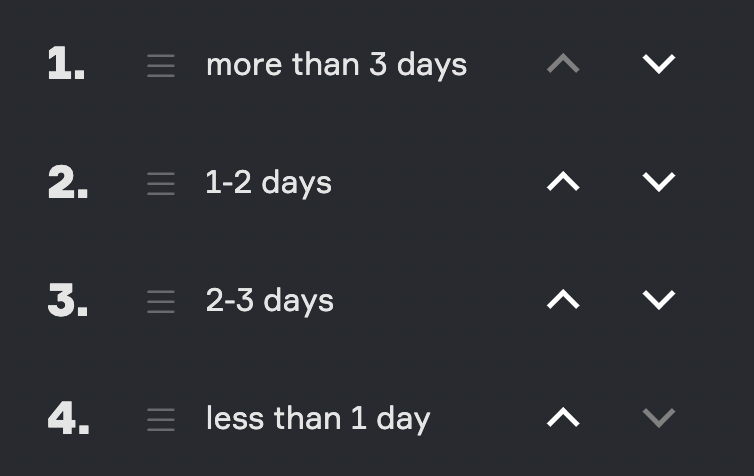
